# Analysis and curation of [cxr14](https://nihcc.app.box.com/v/ChestXray-NIHCC) dataset

The dataset consists of x-ray images of patients and the labels are the conditions that are present on the patient.

In [104]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
import seaborn as sns


In [105]:
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation',
          'No Finding']
labels.sort()
print(labels)

#read the whole dataset
df = pd.read_csv("dataset/Data_Entry_2017_v2020.csv")

df_count = (df.groupby('Patient ID')
         .agg({'Patient ID' : 'count'})
         .rename(columns={'Patient ID':'count'}))

print('Total entries:',len(df.index))
print('No of patients:',df_count.query('count > 1').shape[0])
df.head()

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Total entries: 112120
No of patients: 13302


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


There are 112120 total x-ray entries of 13302 patients
We observe that there exists only a single label where the conditions are words delimited with a character (|). If we try to find the unique disease combinations we get alot of them.

Number of disease combinations : 836
                                                    count
No Finding                                          60361
Infiltration                                         9547
Atelectasis                                          4215
Effusion                                             3955
Nodule                                               2705
...                                                   ...
Atelectasis|Consolidation|Edema|Effusion|Infilt...      1
Atelectasis|Consolidation|Effusion|Emphysema|Ma...      1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumo...      1
Edema|Infiltration|Pneumothorax                         1
Atelectasis|Consolidation|Mass|Pleural_Thickeni...      1

[836 rows x 1 columns]


[]

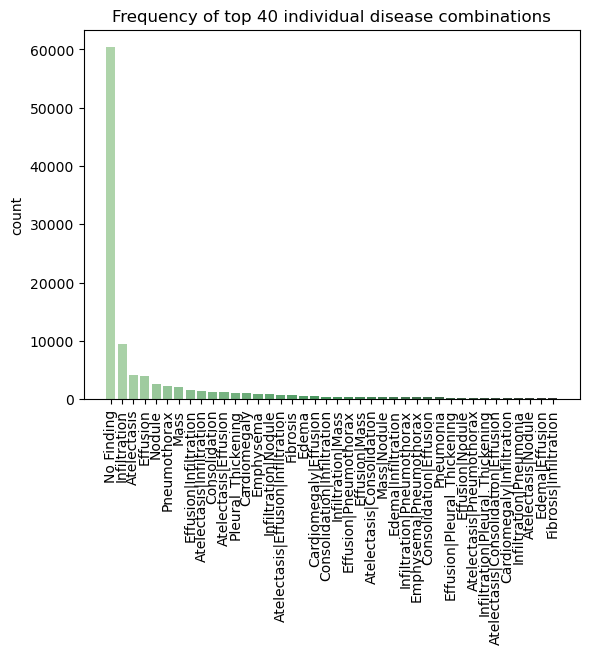

In [106]:
counts = df['Finding Labels'].value_counts().to_frame(name = 'count')
disease_combinations = len(counts.index)
print('Number of disease combinations :', disease_combinations)

print(counts)
sns.barplot(x = counts.index[:40], y='count', data=counts[:40], palette="Greens_d")
plt.xticks(rotation = 90)
plt.title('Frequency of top 40 individual disease combinations')
plt.plot()

This representation is not easy to work with. We will have to transform this to one column per label when we will actually use the dataset.

In [107]:
for label in labels:
    df[label] = df['Finding Labels'].map(lambda res: 1 if label in res else 0)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,1,0,0,0,0,0,0,0


We can now plot the frequency graph of each individual disease:


                    count
No Finding          60361
Infiltration        19894
Effusion            13317
Atelectasis         11559
Nodule               6331
Mass                 5782
Pneumothorax         5302
Consolidation        4667
Pleural_Thickening   3385
Cardiomegaly         2776
Emphysema            2516
Edema                2303
Fibrosis             1686
Pneumonia            1431
Hernia                227


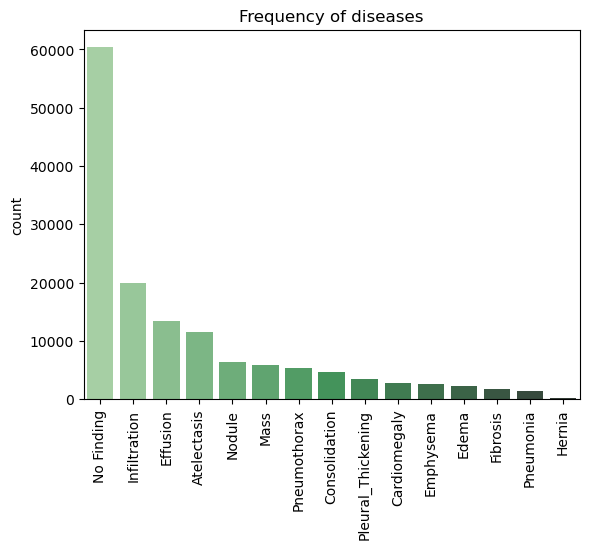

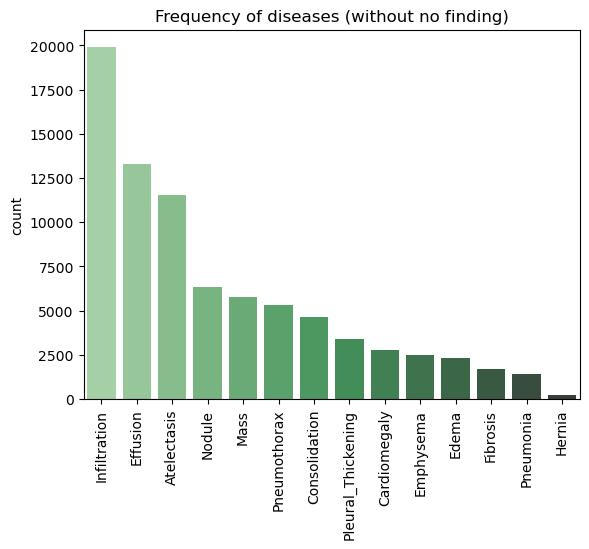

In [108]:
label_count = df[labels].sum().to_frame('count').sort_values(['count'], ascending=False)
print(label_count)

sns.barplot(x = label_count.index, y='count', data=label_count, palette="Greens_d")
plt.xticks(rotation = 90)
plt.title('Frequency of diseases')
plt.show()
sns.barplot(x = label_count.index.drop('No Finding'), y='count', data=label_count.drop('No Finding'), palette="Greens_d")
plt.xticks(rotation = 90)
plt.title('Frequency of diseases (without no finding)')
plt.show()


We observe that Infiltration, Effusion and Atelectasis are the conditions that occur the most. Moreover a substatial amount of x-rays depict people that don't have any of the conditions. To get a better look we will plot the same graphs but with a percentage of the total entries:

                       count
No Finding          0.538361
Infiltration        0.177435
Effusion            0.118775
Atelectasis         0.103095
Nodule              0.056466
Mass                0.051570
Pneumothorax        0.047289
Consolidation       0.041625
Pleural_Thickening  0.030191
Cardiomegaly        0.024759
Emphysema           0.022440
Edema               0.020540
Fibrosis            0.015037
Pneumonia           0.012763
Hernia              0.002025


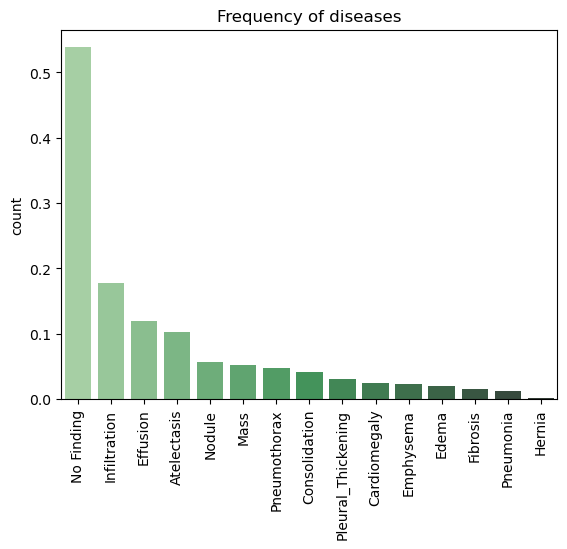

In [115]:
total_entries = len(df.index)
entries_without_no_finding = len(df[df['Finding Labels']!='No Finding'])
label_count = df[labels].sum().to_frame('count').sort_values(['count'], ascending=False)/total_entries
print(label_count)

sns.barplot(x = label_count.index, y='count', data=label_count, palette="Greens_d")
plt.xticks(rotation = 90)
plt.title('Frequency of diseases')
plt.show()

Infiltration is ~20%, Effusion and Atelectasis ~10% and a stagering ~50% of the xrays depict no condition

Now let's explore the non image features of the dataset.


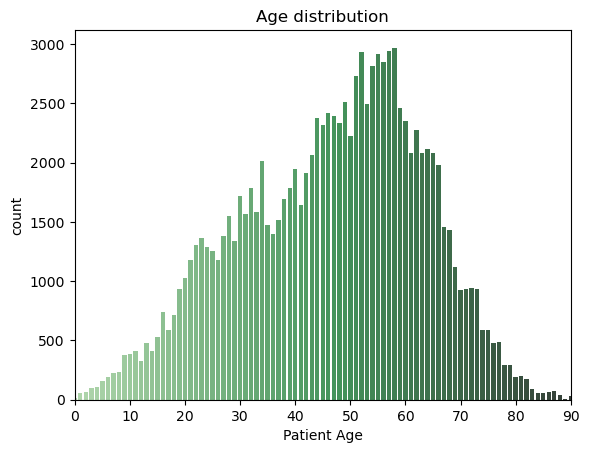

In [42]:
plot = sns.countplot(x='Patient Age',data=df, palette="Greens_d")
plot.set_xlim(0,90)
plot.set(title='Age distribution');
x = np.arange(0,100,10)
plot.set_xticks(x)
plot.set_xticklabels(x);



Some patients tend to have follow ups. Let's observe how many.

Text(0.5, 1.0, 'Follow-up distribution')

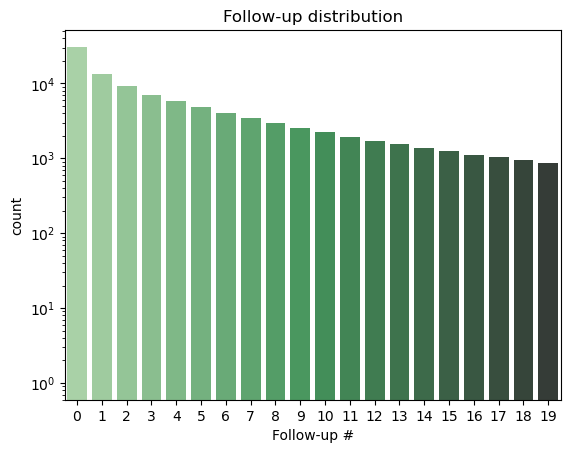

In [47]:
plot = sns.countplot(x='Follow-up #',data=df, order = pd.value_counts(df['Follow-up #']).index, palette="Greens_d")
plot.set_title('Follow-up distribution')
plot.set_yscale("log")

plot = sns.countplot(x='Follow-up #',data=df, order = pd.value_counts(df['Follow-up #']).iloc[:20].index, palette="Greens_d")
plot.set_title('Follow-up distribution')

In [ ]:
# Distribution age by sex (2 plots)